# Example 9.6: Jet Propulsion (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement



## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.kSI import *
   
air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [4]:
T[1] = Quantity(-40,'degC')   # Inlet Temperature
p[1] = Quantity(35,'kPa')     # Compressor Inlet pressure
r_p = Quantity(10,' ')        # Pressure ratio
T[4] = Quantity(1000,'degC')  # Turbine inlet temperature
mdot = Quantity(50,'kg/s')    # mass flow rate
V=Vel
V[1] = Quantity(250,'m/s')    # Velocity

Summary();

### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Combustors
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
"Ideal Gas"
R = air.R

"Constant thermal properties evaluated at room temperature"
T_room = Quantity(25,'degC')
c_v = air.Cv(T=T_room)
c_p = air.Cp(T=T_room)
k = air.k(T=T_room)

Summary();

#### (a) $w_{net}$

In [6]:
%%showcalc
"### 1-2) Diffuser"
T[2] = T[1].to('K') + V[1]**2/(2*c_p)
p[2] = p[1]*(T[2].to('K')/T[1].to('K'))**(k/(k-1))

"### 2-3) Isentropic compression"
p[3] = p[2]*r_p
T[3] = T[2].to('K')*(p[3]/p[2])**((k-1)/k)
Wdot_2_to_3 = mdot*c_p*(T[2]-T[3])

"### 3-4) Combustion"
p[4]=p[3]
Qdot_3_to_4 = mdot*c_p*(T[4]-T[3])

"### 4-5) Turbine"
Wdot_4_to_3 = -Wdot_2_to_3
T[5] = T[4] - Wdot_4_to_3/(mdot*c_p)
p[5] = p[4]*(T[5]/T[4])**(k/(k-1))

"### 5-6) Isentropic Expansion"
p[6] = p[1]
T[6] = T[5]*(p[6]/p[5])**((k-1)/k)
V[6] = (2*c_p*(T[5]-T[6]))**0.5

### 1-2) Diffuser
\begin{align}
  {T}_{ 2 } &=  {T}_{ 1 } + \frac{ {{V}_{ 1 }}^{2} }{  2  \cdot  c_{p}  } \\
    &= 233.15\ \mathrm{K} + \frac{ {\left(250\ \frac{\mathrm{m}}{\mathrm{s}} \right)}^{2} }{  2  \cdot  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  }\\
    &= 264.25\ \mathrm{K}
\end{align}

\begin{align}
  {p}_{ 2 } &=   {p}_{ 1 }  \cdot  {\left(\frac{ {T}_{ 2 } }{ {T}_{ 1 } }\right)}^{\frac{ k }{  k - 1  }}  \\
    &=  35\ \mathrm{kPa}  \cdot  {\left(\frac{ 264.25\ \mathrm{K} }{ 233.15\ \mathrm{K} }\right)}^{\frac{ 1.4 }{  1.4 - 1  }} \\
    &= 54.253\ \mathrm{kPa}
\end{align}

### 2-3) Isentropic compression
\begin{align}
  {p}_{ 3 } &=   {p}_{ 2 }  \cdot  r_{p}  \\
    &=  54.253\ \mathrm{kPa}  \cdot  10 \\
    &= 542.53\ \mathrm{kPa}
\end{align}

\begin{align}
  {T}_{ 3 } &=   {T}_{ 2 }  \cdot  {\left(\frac{ {p}_{ 3 } }{ {p}_{ 2 } }\right)}^{\frac{  k - 1  }{ k }}  \\
    &=  264.25\ \mathrm{K}  \cdot  {\left(\frac{ 542.53\ \mathrm{kPa} }{ 54.253\ \mathrm{kPa} }\right)}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 510.18\ \mathrm{K}
\end{align}

\begin{align}
  \dot{W}_{2\to{}3} &=    \dot{m}  \cdot  c_{p}   \cdot  \left(  {T}_{ 2 } - {T}_{ 3 }  \right)  \\
    &=   50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  \left(  264.25\ \mathrm{K} - 510.18\ \mathrm{K}  \right) \\
    &= -1.2354\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

### 3-4) Combustion
\begin{align}
  {p}_{ 4 } &=  {p}_{ 3 }  = 542.53\ \mathrm{kPa} 
\end{align}

\begin{align}
  \dot{Q}_{3\to{}4} &=    \dot{m}  \cdot  c_{p}   \cdot  \left(  {T}_{ 4 } - {T}_{ 3 }  \right)  \\
    &=   50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  \left(  1273.2\ \mathrm{K} - 510.18\ \mathrm{K}  \right) \\
    &= 3.8329\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

### 4-5) Turbine
\begin{align}
  \dot{W}_{4\to{}3} &=  -\dot{W}_{2\to{}3}  = -\left( -1.2354\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} \right) = 1.2354\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

\begin{align}
  {T}_{ 5 } &=   {T}_{ 4 } - \frac{ \dot{W}_{4\to{}3} }{  \dot{m}  \cdot  c_{p}  }  \\
    &=  1273.2\ \mathrm{K} - \frac{ 1.2354\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} }{  50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  } \\
    &= 1027.2\ \mathrm{K}
\end{align}

\begin{align}
  {p}_{ 5 } &=   {p}_{ 4 }  \cdot  {\left(\frac{ {T}_{ 5 } }{ {T}_{ 4 } }\right)}^{\frac{ k }{  k - 1  }}  \\
    &=  542.53\ \mathrm{kPa}  \cdot  {\left(\frac{ 1027.2\ \mathrm{K} }{ 1273.2\ \mathrm{K} }\right)}^{\frac{ 1.4 }{  1.4 - 1  }} \\
    &= 255.95\ \mathrm{kPa}
\end{align}

### 5-6) Isentropic Expansion
\begin{align}
  {p}_{ 6 } &=  {p}_{ 1 }  = 35\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ 6 } &=   {T}_{ 5 }  \cdot  {\left(\frac{ {p}_{ 6 } }{ {p}_{ 5 } }\right)}^{\frac{  k - 1  }{ k }}  \\
    &=  1027.2\ \mathrm{K}  \cdot  {\left(\frac{ 35\ \mathrm{kPa} }{ 255.95\ \mathrm{kPa} }\right)}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 581.83\ \mathrm{K}
\end{align}

\begin{align}
  {V}_{ 6 } &=  {\left(  2  \cdot  c_{p}   \cdot  \left(  {T}_{ 5 } - {T}_{ 6 }  \right) \right)}^{0.5} \\
    &= {\left(  2  \cdot  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  \left(  1027.2\ \mathrm{K} - 581.83\ \mathrm{K}  \right) \right)}^{0.5}\\
    &= 946.05\ \frac{\mathrm{m}}{\mathrm{s}}
\end{align}



#### (b) Net Thrust

In [7]:
%%showcalc
F_Net = (mdot*(V[6]-V[1])).to('N')

\begin{align}
  F_{Net} &=   \dot{m}  \cdot  \left(  {V}_{ 6 } - {V}_{ 1 }  \right)  \\
    &=  50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  946.05\ \frac{\mathrm{m}}{\mathrm{s}} - 250\ \frac{\mathrm{m}}{\mathrm{s}}  \right) \\
    &= 3.4803\times 10^{4}\ \mathrm{N}
\end{align}



#### (c) Propulsive Power

In [8]:
%%showcalc
Wdot_P = (F_Net*V[1]).to('W')

\begin{align}
  \dot{W}_{P} &=   F_{Net}  \cdot  {V}_{ 1 }  \\
    &=  3.4803\times 10^{4}\ \mathrm{N}  \cdot  250\ \frac{\mathrm{m}}{\mathrm{s}} \\
    &= 8.7006\times 10^{6}\ \mathrm{W}
\end{align}



#### (d) Propulsive Efficiency

In [9]:
%%showcalc
eta_P = (Wdot_P/Qdot_3_to_4).to('')

\begin{align}
  \eta_{P} &=  \frac{ \dot{W}_{P} }{ \dot{Q}_{3\to{}4} } \\
    &= \frac{ 8.7006\times 10^{6}\ \mathrm{W} }{ 3.8329\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 0.227
\end{align}



#### Summary of Results

In [10]:
Summary()
Summary(['F_Net','Wdot_P','eta_P']);

#### Sketch a $p$−$v$ diagram for the cycle

##### Linear Scale

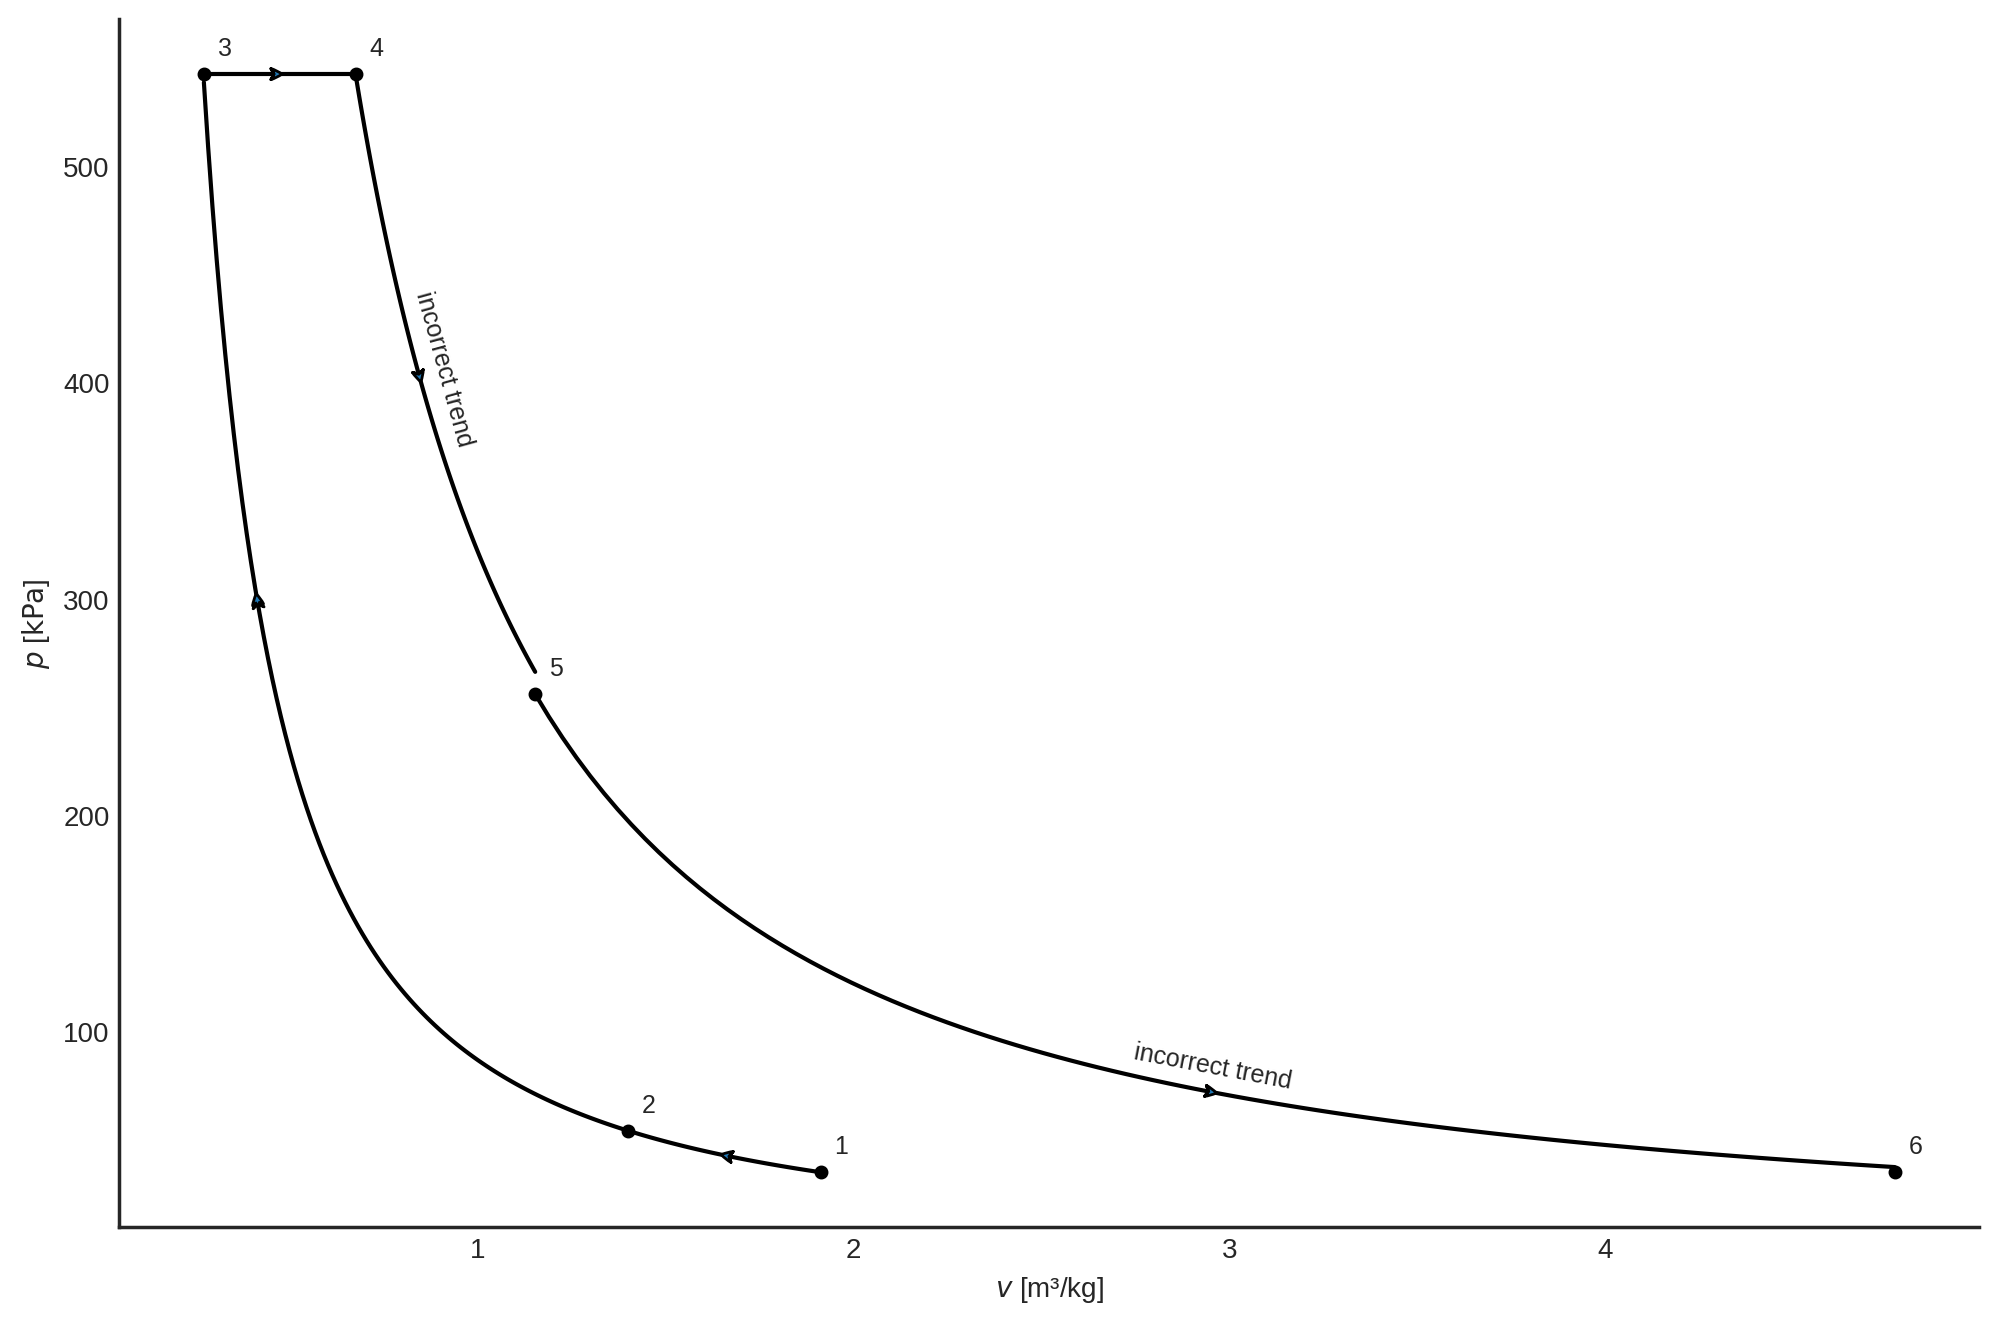

In [11]:
pv = air.pv_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    v[state] = air.v(T[state],p[state])
    h[state] = air.h(T[state],p[state])
    s[state] = air.s(T[state],p[state])
    pv.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic', label='incorrect trend') # 4->5
pv.plot_process(states[5],states[6], path='isentropic', label='incorrect trend'); # 5->6

##### Log-Log Scale

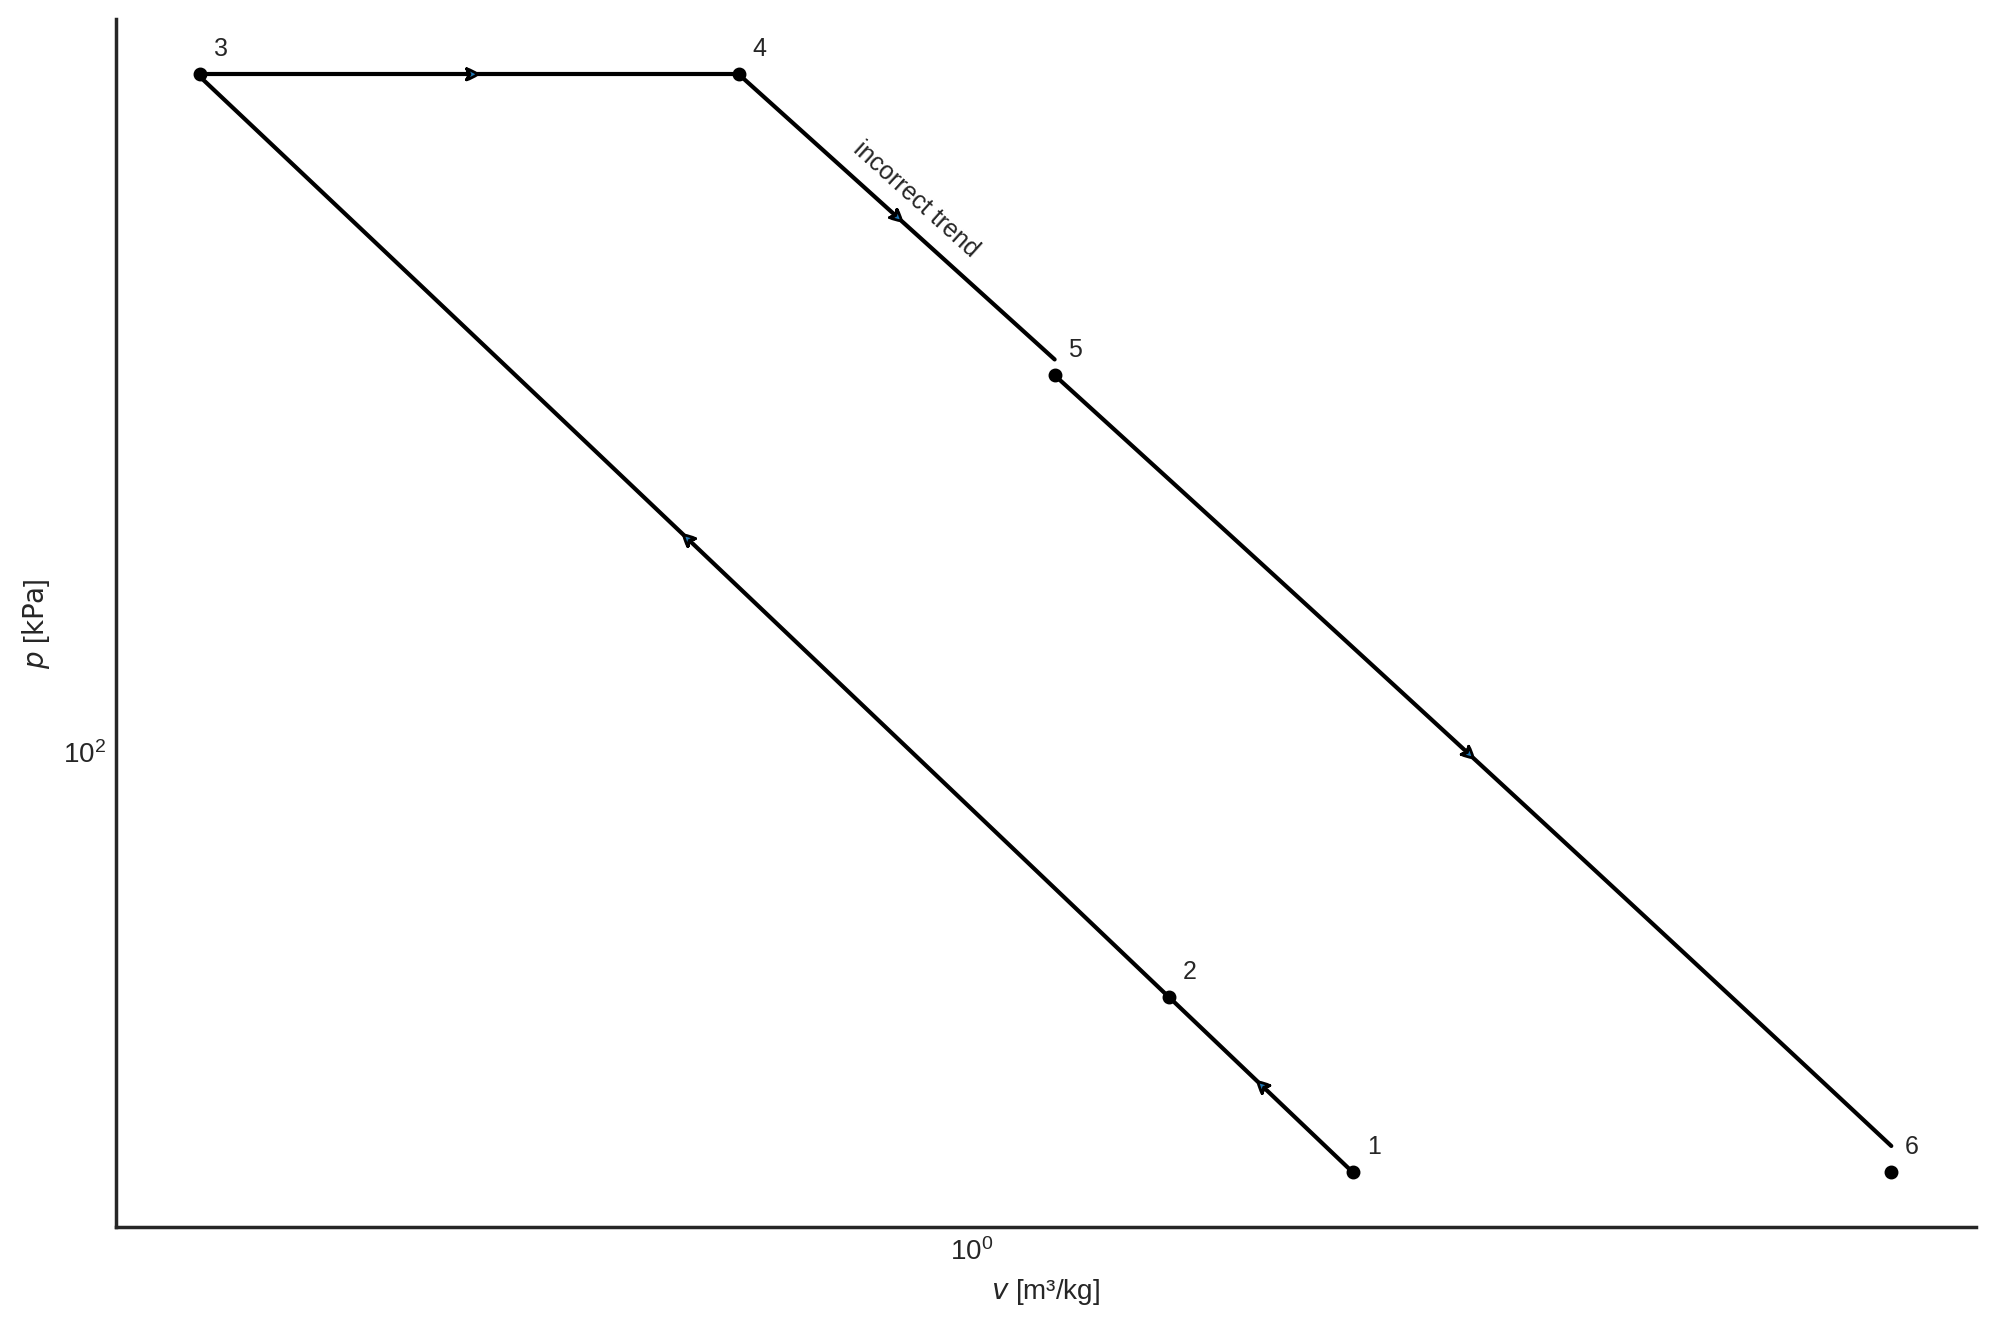

In [12]:
pv = air.pv_diagram(log_x=True, log_y=True)
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    v[state] = air.v(T[state],p[state])
    h[state] = air.h(T[state],p[state])
    s[state] = air.s(T[state],p[state])
    pv.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic', label='incorrect trend') # 4->5
pv.plot_process(states[5],states[6], path='isentropic'); # 5->6

#### $T$-$s$ diagram

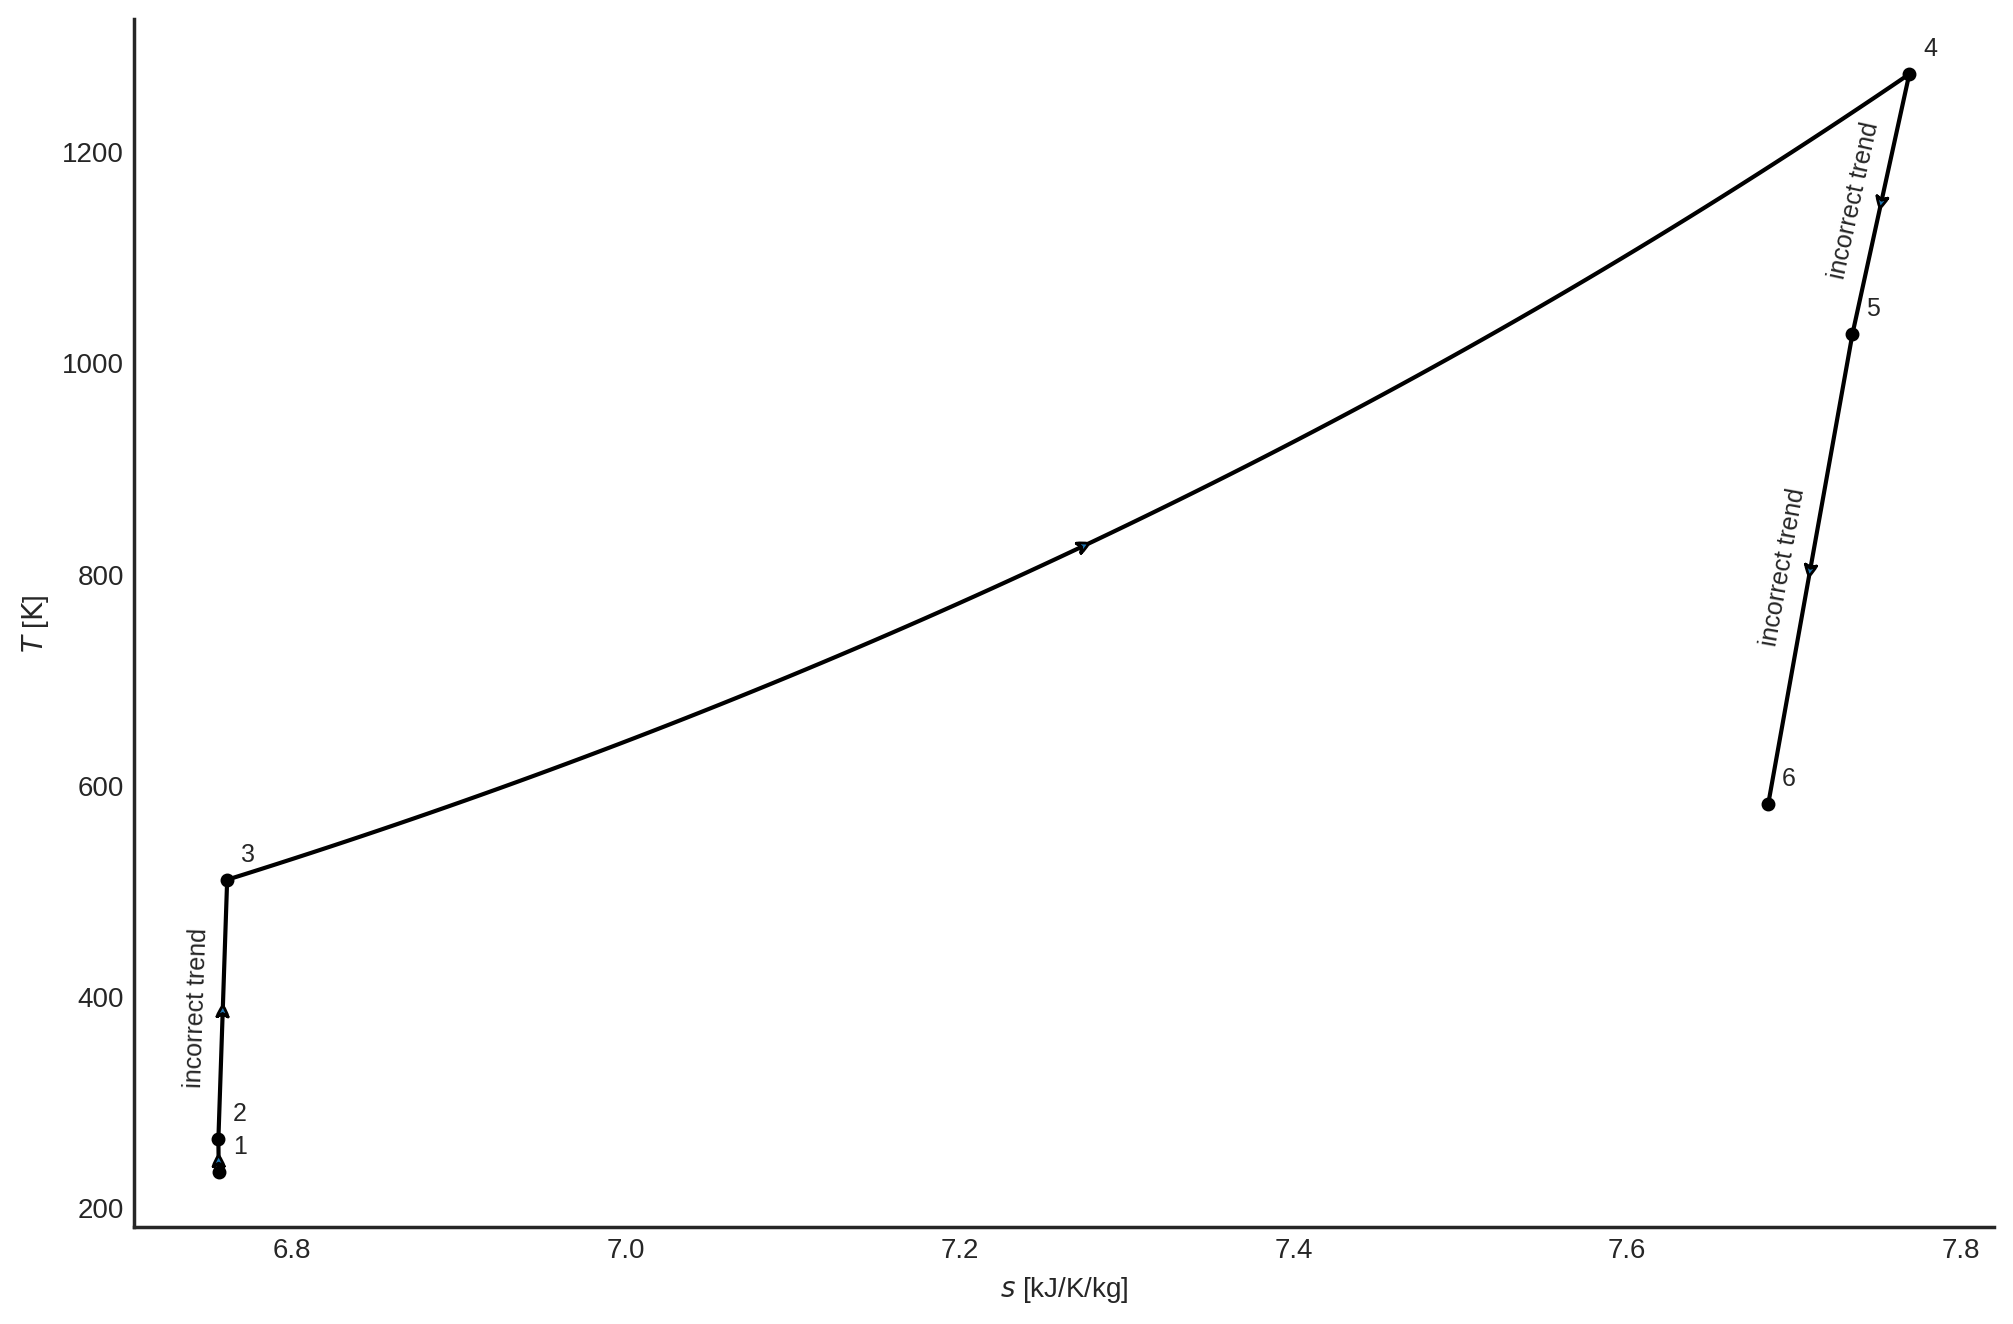

In [13]:
Ts = air.Ts_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    Ts.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic'
Ts.plot_process(states[1],states[2], path='isentropic') # 1->2
Ts.plot_process(states[2],states[3], path='isentropic', label='incorrect trend') # 2->3
Ts.plot_process(states[3],states[4], path='isobaric') # 3->4
Ts.plot_process(states[4],states[5], path='isentropic', label='incorrect trend') # 4->5
Ts.plot_process(states[5],states[6], path='isentropic', label='incorrect trend'); # 5->6

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --to html_embed --no-input --no-prompt "Ex9.6 Jet-Propulsion (Cold-Air-Standard).ipynb"